<a href="https://www.kaggle.com/code/kapturovalexander/sql-postgresql-for-data-science?scriptVersionId=160234859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://posteet.com/wp-content/uploads/2019/10/movies1.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pagila-postgresql-sample-database/city.csv
/kaggle/input/pagila-postgresql-sample-database/4. before_additional_sakila_data.sql
/kaggle/input/pagila-postgresql-sample-database/actor.csv
/kaggle/input/pagila-postgresql-sample-database/2. pagila-insert-data.sql
/kaggle/input/pagila-postgresql-sample-database/staff.csv
/kaggle/input/pagila-postgresql-sample-database/query_3_result.csv
/kaggle/input/pagila-postgresql-sample-database/6. get_customer_balance.sql
/kaggle/input/pagila-postgresql-sample-database/address.csv
/kaggle/input/pagila-postgresql-sample-database/1. pagila-schema.sql
/kaggle/input/pagila-postgresql-sample-database/inventory.csv
/kaggle/input/pagila-postgresql-sample-database/3. release_year_update.sql
/kaggle/input/pagila-postgresql-sample-database/payment.csv
/kaggle/input/pagila-postgresql-sample-database/5. additional_sakila_data.sql
/kaggle/input/pagila-postgresql-sample-database/film_category.csv
/kaggle/input/pagila-postgresql-sample-database/custome

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">🎬 1. Display the number of films in each category, sorted in descending order

```SQL
SELECT
	COUNT(film_category.film_id) AS films_in_category,
	category.category_id
FROM
	category
    LEFT JOIN film_category ON
		category.category_id = film_category.category_id
GROUP BY
	category.category_id
ORDER BY
	films_in_category DESC;
```

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">🎭 2. Display the 10 actors whose films rented the most, sorted in descending order</span>

```SQL
SELECT
	actor.actor_id,
	actor.first_name,
	actor.last_name,
	COUNT(rental.rental_id) AS rented_times
FROM
	actor
	LEFT JOIN film_actor ON
		actor.actor_id = film_actor.actor_id
	LEFT JOIN film ON
		film_actor.film_id = film.film_id
	LEFT JOIN inventory ON
		film.film_id = inventory.film_id
	LEFT JOIN rental ON
		inventory.inventory_id = rental.inventory_id
GROUP BY
	actor.actor_id
ORDER BY
	rented_times DESC
LIMIT
	10;
```

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">👩🏻‍🎤 3. Display the category of films on which they spent the most mone</span>

```SQL
SELECT
    category.name,
    SUM(payment.amount) AS total_spent
FROM
    category
    INNER JOIN film_category ON
        category.category_id = film_category.category_id
    INNER JOIN film ON
        film_category.film_id = film.film_id
    INNER JOIN inventory ON
        film.film_id = inventory.film_id
    INNER JOIN rental ON
        inventory.inventory_id = rental.inventory_id
    INNER JOIN payment ON
        rental.rental_id = payment.rental_id
GROUP BY
    category.name
ORDER BY
    total_spent DESC
LIMIT
	1;
```

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">📽 4. Print titles of movies that are not in inventory. Write a query without using the IN operator</span>

```SQL
SELECT
	film.title
FROM
	film
	LEFT JOIN inventory ON
		film.film_id = inventory.film_id
WHERE
	inventory.film_id IS NULL
ORDER BY
	film.title ASC;
```

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">🍿 5. Display the top 3 actors who have most appeared in films in the “Children” category. If several actors have the same number of films, output all</span>

```SQL
SELECT
	temporary_table.appearance_rank,
	temporary_table.first_name,
	temporary_table.last_name,
	temporary_table.appeared_in_films
FROM
	(SELECT
	 	-- create Window function DENSE_RANK
		DENSE_RANK() OVER(
			ORDER BY 
			COUNT(film.film_id) DESC
		) AS appearance_rank,
		actor.first_name,
		actor.last_name,
		COUNT(film.film_id) AS appeared_in_films
	FROM
		actor
		INNER JOIN film_actor ON
			actor.actor_id = film_actor.actor_id
		INNER JOIN film ON
			film_actor.film_id = film.film_id
		INNER JOIN film_category ON
			film.film_id = film_category.film_id
		INNER JOIN category ON
			film_category.category_id = category.category_id
	WHERE
		category.name = 'Children'
	GROUP BY
		actor.actor_id
	ORDER BY
		appeared_in_films DESC
	) AS temporary_table  -- subquery result table
WHERE
	appearance_rank < 4;
```

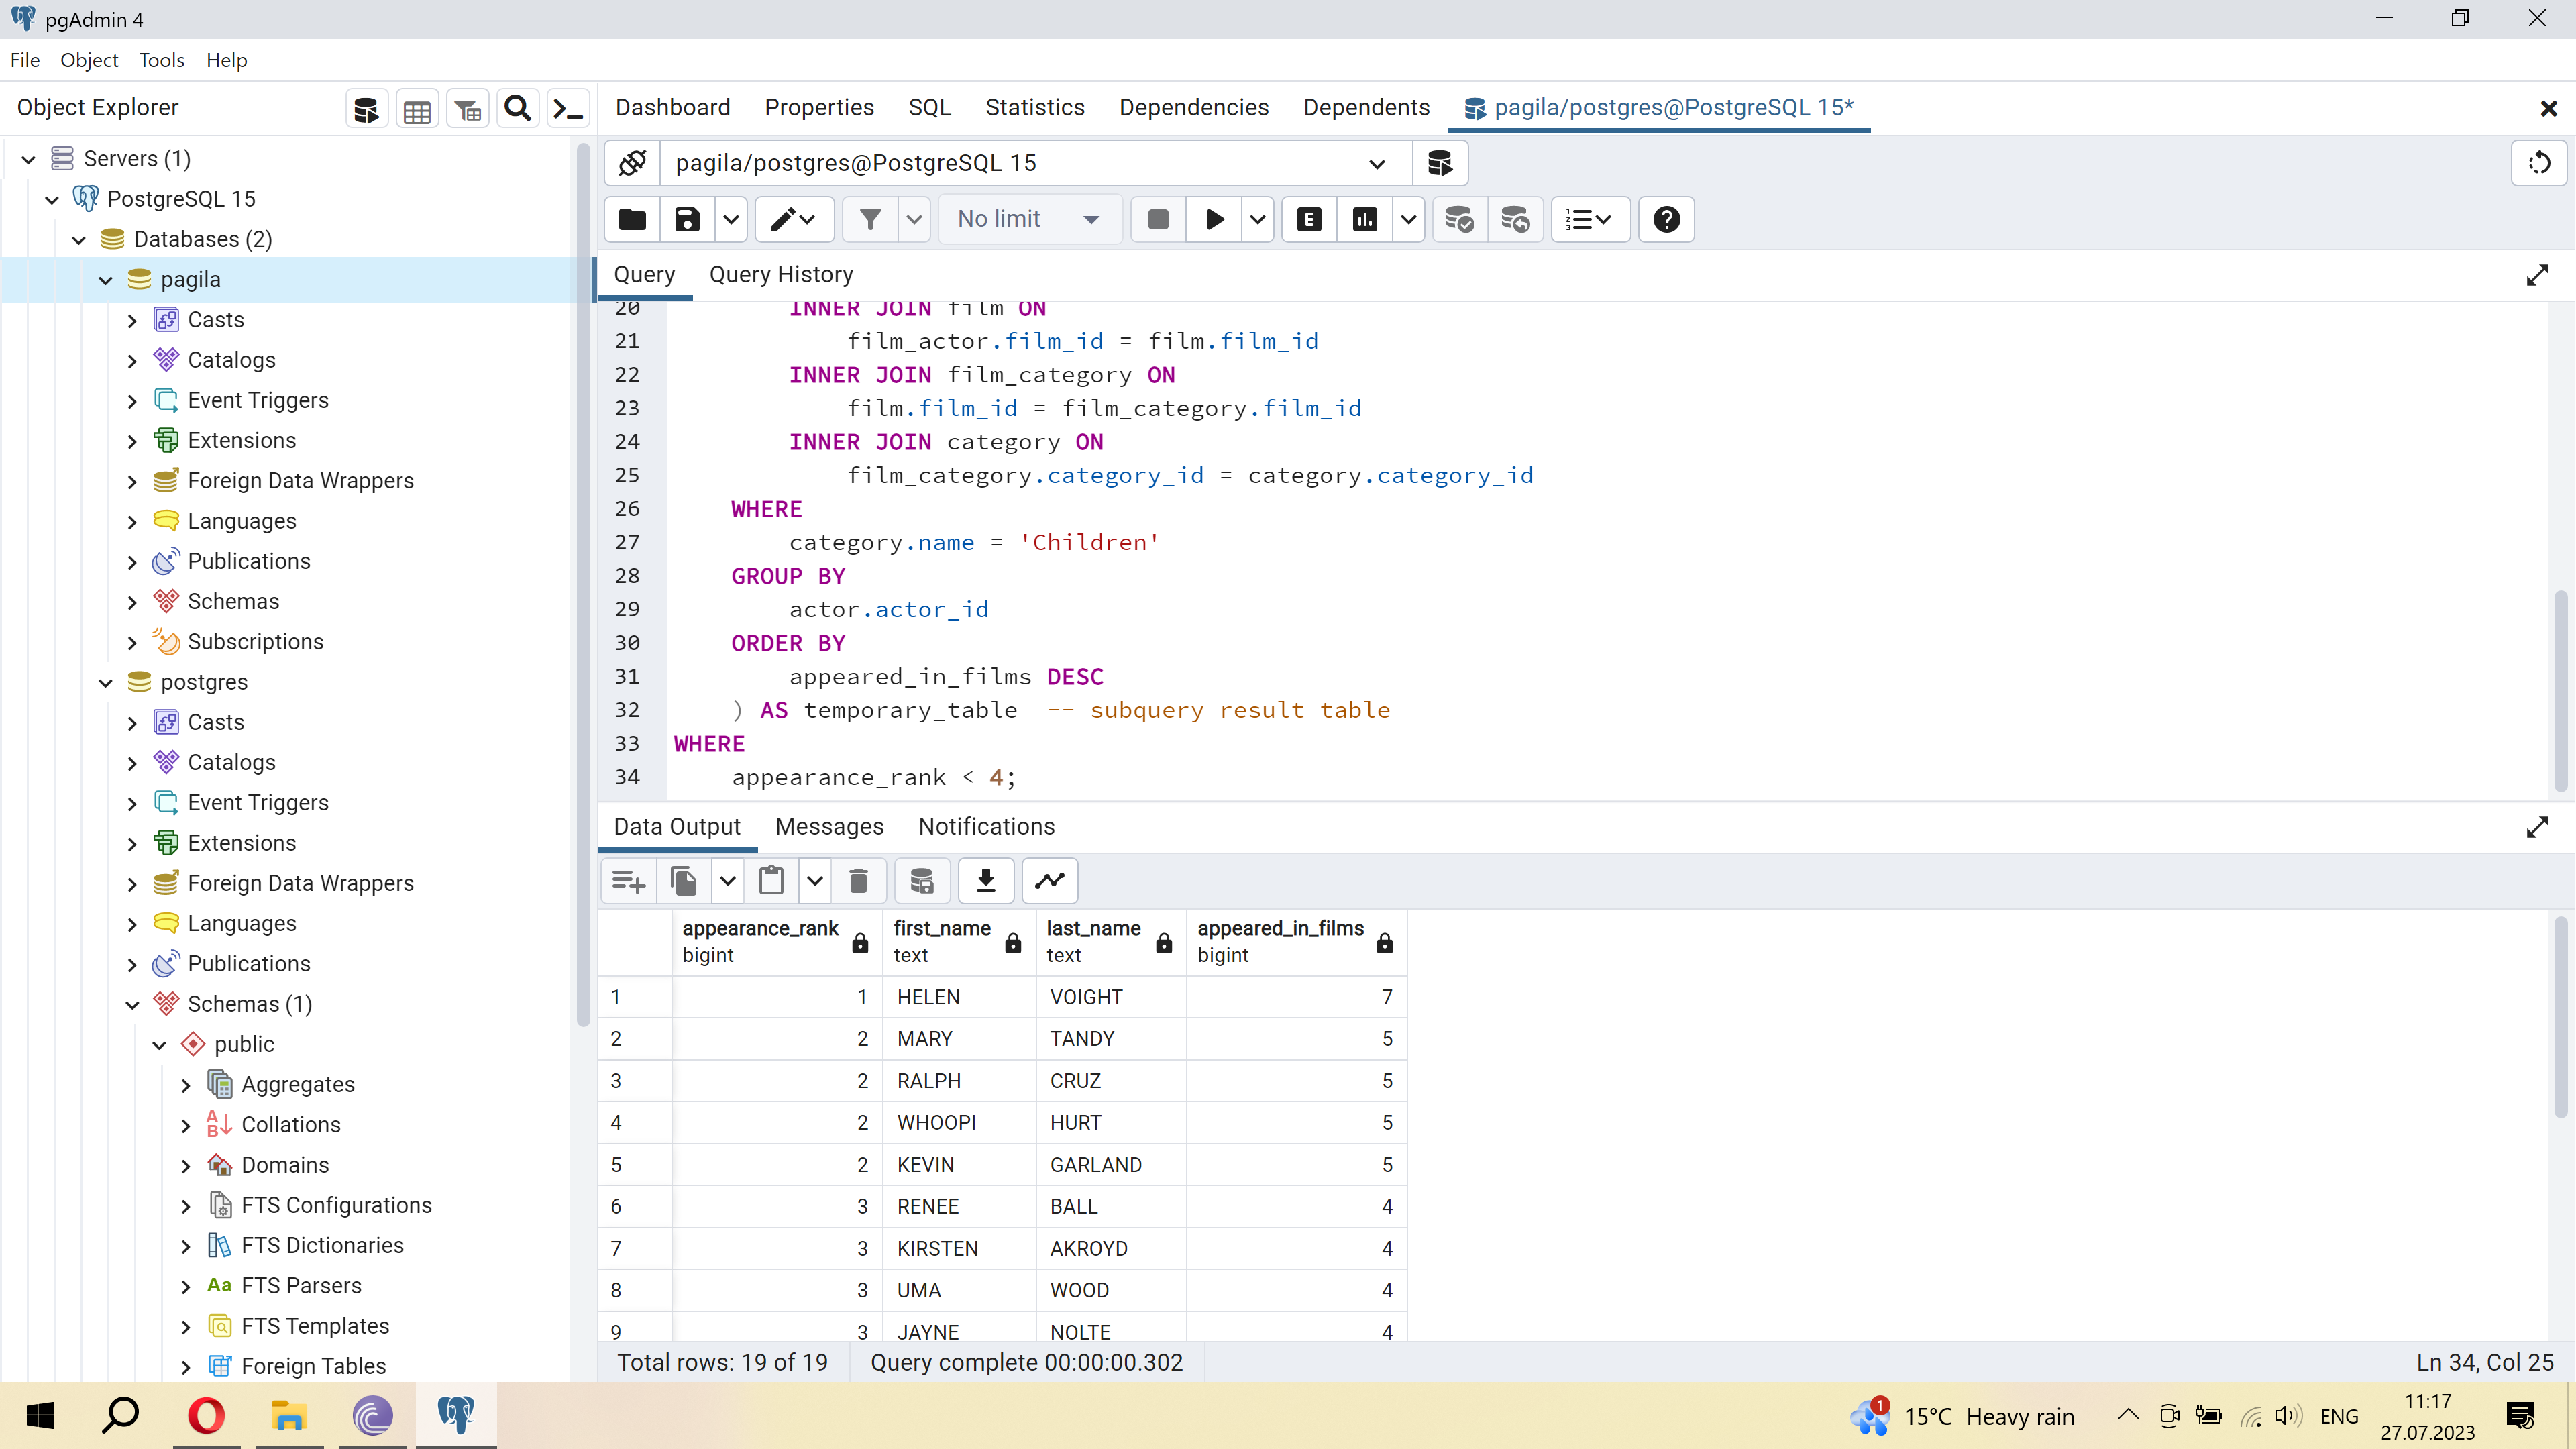

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">🎞 6. Display cities with the number of active and inactive customers (active — customer.active = 1). Sort by the number of inactive clients in descending order</span>

```SQL
SELECT
	city.city,
	COUNT(CASE
			WHEN customer.active = 1
				THEN 1
		END) AS active_customers,
	COUNT(CASE
			WHEN customer.active = 0
				THEN 1
		END) AS inactive_customers
FROM
	city
	INNER JOIN address ON
		city.city_id = address.city_id
	INNER JOIN customer ON
		address.address_id = customer.address_id
GROUP BY
	city.city
ORDER BY
	inactive_customers DESC;
```

# <span style="color: salmon; border-bottom: 8px solid #e3abff; padding-left: 15px; background-color: #fadb8c; padding-right: 15px;">🎦 7. Output the category of movies that has the largest number of hours of total rental in cities (customer.address_id in this city), and that starts with the letter “a”. Do the same for cities in which there is a “-” symbol. Write everything in one request</span>

```SQL
SELECT
	category.name,
	EXTRACT (HOUR FROM SUM(rental.return_date - rental.rental_date)) AS total_rental_hours
FROM
	category
	INNER JOIN film_category USING (category_id)
	INNER JOIN film USING (film_id)
	INNER JOIN inventory USING (film_id)
	INNER JOIN rental USING (inventory_id)
	INNER JOIN customer USING (customer_id)
	INNER JOIN address USING (address_id)
	INNER JOIN city USING (city_id)
WHERE
	LOWER(city.city) LIKE 'a%' OR city.city LIKE '%-%'
GROUP BY
	category.name
ORDER BY
	total_rental_hours DESC
LIMIT
	1;
```

# <span style="color: gold">Thank You for Your attention</span>